<a href="https://colab.research.google.com/github/Charlsgit/Car-Service-Prediction-ML-project/blob/main/Car_Service_Train_dataset(Randomforest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all the Liberaries and ML models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #CLASSIFIERS: Because they predict lables
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#STAGE 1: Load the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data /serviceTrainData (1).csv")
print(df.head())

    Car ID     OilQual  EnginePerf  NormMileage    TyreWear    HVACwear  \
0  CAR_001  103.388821  103.504032   103.051485  106.172658  105.686843   
1  CAR_002   26.765516   26.188265    31.259536   29.186162   31.311275   
2  CAR_003   62.413282   63.681061    59.720883   64.704031   58.620518   
3  CAR_004   45.533338   49.906615    48.777581   48.113851   47.952072   
4  CAR_005  104.388821  103.284032   103.051485  105.822658  106.536843   

  Service  
0      No  
1     Yes  
2     Yes  
3      No  
4      No  


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
x=df.drop("Car ID", axis=1)
x

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.686843,No
1,26.765516,26.188265,31.259536,29.186162,31.311275,Yes
2,62.413282,63.681061,59.720883,64.704031,58.620518,Yes
3,45.533338,49.906615,48.777581,48.113851,47.952072,No
4,104.388821,103.284032,103.051485,105.822658,106.536843,No
...,...,...,...,...,...,...
310,105.168821,103.744032,103.051485,107.172658,104.856843,No
311,104.388821,105.744032,103.051485,105.782658,104.196843,No
312,63.823282,62.741061,59.720883,61.654031,62.620518,Yes
313,26.535516,27.418265,31.259536,27.486162,33.311275,Yes


In [ ]:
print(df.head()) #Default it shows 5 columns

    Car ID     OilQual  EnginePerf  NormMileage    TyreWear    HVACwear  \
0  CAR_001  103.388821  103.504032   103.051485  106.172658  105.686843   
1  CAR_002   26.765516   26.188265    31.259536   29.186162   31.311275   
2  CAR_003   62.413282   63.681061    59.720883   64.704031   58.620518   
3  CAR_004   45.533338   49.906615    48.777581   48.113851   47.952072   
4  CAR_005  104.388821  103.284032   103.051485  105.822658  106.536843   

  Service  
0      No  
1     Yes  
2     Yes  
3      No  
4      No  


##Count of cars which need services and those don't need

In [ ]:
print(df["Service"].value_counts())

Service
No     232
Yes     83
Name: count, dtype: int64


##Encode the Target Vabrables

In [ ]:
df['Service'] = df['Service'].map({'Yes': 1, 'No': 0}) #Converts all the Yes and No variables to 0s and 1s
print(df.head())

    Car ID     OilQual  EnginePerf  NormMileage    TyreWear    HVACwear  \
0  CAR_001  103.388821  103.504032   103.051485  106.172658  105.686843   
1  CAR_002   26.765516   26.188265    31.259536   29.186162   31.311275   
2  CAR_003   62.413282   63.681061    59.720883   64.704031   58.620518   
3  CAR_004   45.533338   49.906615    48.777581   48.113851   47.952072   
4  CAR_005  104.388821  103.284032   103.051485  105.822658  106.536843   

   Service  
0        0  
1        1  
2        1  
3        0  
4        0  


#STAGE 2: Data Cleaning

In [ ]:
print("\nMissing values:\n", df.isnull().sum())   # Check missing values

df.fillna(df.mean(numeric_only=True), inplace=True)   # Fill numeric NaNs with mean

df.drop_duplicates(inplace=True) # Drop duplicates (if any)


Missing values:
 Car ID         0
OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64


#STAGE 3: Slpit The Data

In [ ]:
# Define features (X) and target (y)
x = df[["OilQual","EnginePerf","NormMileage","TyreWear","HVACwear"]] #Trains the model(80%)
y = df["Service"] #Tests the model (20%)

#Split the data into training and testing (80-20)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("Training set size:", x_train.shape)  # x_train.shape: Dimensions (252 rows and 5 columns)
print("Testing set size:", x_test.shape)    # x_test.shape: Dimensions (63 rows and 5 columns)

Training set size: (252, 5)
Testing set size: (63, 5)


#STAGE 4: Build and train Random Forest Model (Algorithm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()     # Create the model
model.fit(x_train, y_train)          # Train the model

y_pred = model.predict(x_test)       # Make predictions


#STAGE 5: Evaluate the Model

In [ ]:
#|    Term       |                  Meaning                      |
#| ------------- | --------------------------------------------- |
#|   Precision   | Of predicted positives, how many were correct |
#|   Recall      | Of actual positives, how many were found      |
#|   F1-score    | Balance between precision & recall            |
#|   Support     | How many actual samples of that class existed |

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        16

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[47  0]
 [ 0 16]]
Accuracy: 1.0


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


#STAGE 6: Visualizing the important features to be prioritized

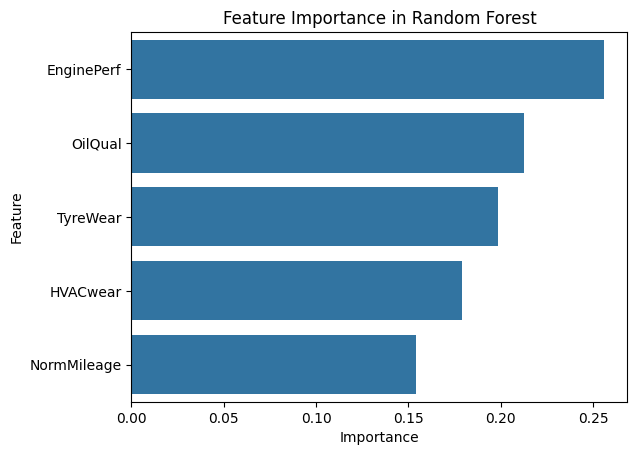

In [ ]:
import pandas as pd
import numpy as np

importances = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Random Forest")
plt.show()

#STAGE 7: Predictions of the cars need to be Prioritrized (Most to Least)

In [ ]:
# Combine with car info (if applicable)
results = x_test.copy()
results['Predicted_Class'] = y_pred

In [ ]:
# Sort from most to least priority
results = results.sort_values(by='Predicted_Class', ascending=False)
results

#Concerting the binary predicted values into Yes and No
results['Predicted_Class'] = results['Predicted_Class'].map({ 1 : 'Yes', 0 : 'No'})
results

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Predicted_Class
78,26.765516,27.418265,31.159536,29.056162,32.311275,Yes
93,57.823282,62.741061,59.400883,63.304031,62.620518,Yes
167,62.413282,63.741061,55.630883,64.454031,62.620518,Yes
193,67.413282,62.741061,59.820883,63.284031,62.620518,Yes
157,26.855516,27.358265,31.259536,29.036162,28.311275,Yes
...,...,...,...,...,...,...
304,44.533338,49.666615,49.107581,48.253851,47.952072,No
292,104.388821,104.664032,103.051485,106.172658,105.856843,No
7,104.388821,103.134032,103.301485,106.172658,105.536843,No
173,2.027185,4.891003,6.938986,8.373161,1.280262,No


In [ ]:
# Get probability scores for positive class
y_prob = model.predict_proba(x_test)[:, 1]
results = x_test.copy()
results['Predicted_Probability'] = y_prob
results = results.sort_values(by='Predicted_Probability', ascending=False)
results

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Predicted_Probability
78,26.765516,27.418265,31.159536,29.056162,32.311275,1.0
93,57.823282,62.741061,59.400883,63.304031,62.620518,1.0
167,62.413282,63.741061,55.630883,64.454031,62.620518,1.0
193,67.413282,62.741061,59.820883,63.284031,62.620518,1.0
157,26.855516,27.358265,31.259536,29.036162,28.311275,1.0
...,...,...,...,...,...,...
304,44.533338,49.666615,49.107581,48.253851,47.952072,0.0
292,104.388821,104.664032,103.051485,106.172658,105.856843,0.0
7,104.388821,103.134032,103.301485,106.172658,105.536843,0.0
173,2.027185,4.891003,6.938986,8.373161,1.280262,0.0
